In [1]:
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

In [15]:
Coords = namedtuple('Coords', ['x_l_eye', 'y_l_eye', 'x_r_eye', 'y_r_eye', 'x_mouth', 'y_mouth',
                              'x_l_ear1', 'y_l_ear1', 'x_l_ear2', 'y_l_ear2', 'x_l_ear3', 'y_l_ear3',
                              'x_r_ear1', 'y_r_ear1', 'x_r_ear2', 'y_r_ear2', 'x_r_ear3', 'y_r_ear3'])

In [16]:
#if using windows file system
#FILE_LOC = 'test_dataset/'
#if using linux file system
FILE_LOC = 'cat_dataset/preprocessing_test/'
files = []
for file in os.listdir(FILE_LOC):
    if file.endswith('.cat'):
        files.append(file)

coord_dict = {}
filenames = [f.split('.')[-3][4:] for f in files]
for i, f in enumerate(files):
    with open(FILE_LOC + f) as file:
        for line in file:
            coord_dict[filenames[i]] = Coords(*[int(l) for l in line.split()[1:]])

In [28]:
print([int(l) for l in line.split()[1:]])
print(line)

[602, 326, 629, 324, 624, 353, 570, 312, 565, 283, 591, 297, 622, 294, 640, 272, 632, 307]
9 602 326 629 324 624 353 570 312 565 283 591 297 622 294 640 272 632 307 


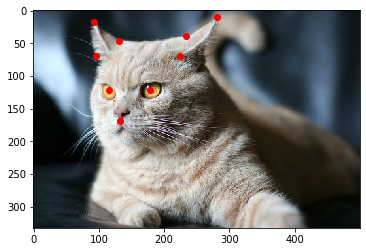

In [19]:
img_files = []
for file in os.listdir(FILE_LOC):
    if file.endswith('.jpg'):
        img_files.append(file)
        
image_dict = {}
img_names = [i.split('.')[-2][4:] for i in img_files]
for i, f in enumerate(img_files):
    image_dict[img_names[i]] = cv2.imread(FILE_LOC + f)

#if using windows file system
#r = int(np.random.choice(10, 1))
#if using linux file system
r = int(np.random.choice(50, 1))
plt.imshow(cv2.cvtColor(image_dict[img_names[r]], cv2.COLOR_BGR2RGB))
plt.plot(coord_dict[filenames[r]].x_l_eye, coord_dict[filenames[r]].y_l_eye, 'ro')
plt.plot(coord_dict[filenames[r]].x_r_eye, coord_dict[filenames[r]].y_r_eye, 'ro')
plt.plot(coord_dict[filenames[r]].x_mouth, coord_dict[filenames[r]].y_mouth, 'ro')
plt.plot(coord_dict[filenames[r]].x_l_ear1, coord_dict[filenames[r]].y_l_ear1, 'ro')
plt.plot(coord_dict[filenames[r]].x_l_ear2, coord_dict[filenames[r]].y_l_ear2, 'ro')
plt.plot(coord_dict[filenames[r]].x_l_ear3, coord_dict[filenames[r]].y_l_ear3, 'ro')
plt.plot(coord_dict[filenames[r]].x_r_ear1, coord_dict[filenames[r]].y_r_ear1, 'ro')
plt.plot(coord_dict[filenames[r]].x_r_ear2, coord_dict[filenames[r]].y_r_ear2, 'ro')
plt.plot(coord_dict[filenames[r]].x_r_ear3, coord_dict[filenames[r]].y_r_ear3, 'ro')
plt.show()

In [22]:
def flip(val, max_val):
    return max_val - val

In [23]:
print(coord_dict[filenames[r]].x_r_ear2, coord_dict[filenames[r]].y_r_ear2, 
      flip(coord_dict[filenames[r]].x_r_ear2), flip(coord_dict[filenames[r]].y_r_ear2))

TypeError: flip() missing 1 required positional argument: 'max_val'

In [ ]:
flipped_coords = {}
flipped_images = {}
for key, annotations in coord_dict:
    if coord_dict[key].y_r_eye > coord_dict[key].y_l_eye:
        